# Suicide Bomber game

In [1]:
import numpy as np

from two_agent_game import Game, SBAgent, suicide_bomber_pay_off
import matplotlib.pyplot as plt
from typing import List

## Analyze Tools 

In [2]:
def average_stratagy(
    member_list: List[SBAgent]
):
    strategy_count = np.zeros(3)
    for mem in member_list:
        if member_list[0].mixed_strategy:
            strategy_count += mem.strategy
        else:
            strategy_count[mem.decision()] += 1

    return strategy_count / len(member_list)

In [3]:
def plot_triangle(ax: plt.Axes):
    ax.plot([0, 1, 0.5, 0], [0, 0, np.sqrt(3)/2, 0])
    ax.text(0, 0, "00", ha="center", va="top")
    ax.text(1, 0, "R0", ha="center", va="top")
    ax.text(0.5, np.sqrt(3) / 2, "RT", ha="center", va="bottom")

def plot_prob_2D(prob_list, ax):
    # visualize a probability in 2D plane

    prob_list = np.array(prob_list)
    
    x = prob_list[:, 1] + prob_list[:, 2] / 2
    y = prob_list[:, 2] * np.sqrt(3) / 2

    ax.scatter(x[0:1], y[0:1])

    ax.plot(x, y)

## Initialize

In [4]:
benefit_kill = 0.5
cost = 0.1

In [11]:
game = Game(
    init_member_num=500,
    pay_off_matrix=suicide_bomber_pay_off(benefit_kill, cost),
    mixed_strategy=True,
    random_seed=None,
)

## Run

In [12]:
round_num = 200
game_in_round = 500

discard_rate = 0.1
mutation_rate = 0.001

In [13]:
ave_str_list = [average_stratagy(game.current_members)]

In [14]:
for _ in range(round_num):
    
    game.multiple_game(game_in_round, cpu_num=8)
    game.discard_member_by_payoff(discard_rate)
    game.bear_new_member_by_payoff()
    game.reset_fitness()
    game.mutation(mutation_rate)

    ave_str_list.append(average_stratagy(game.current_members))


## Plot

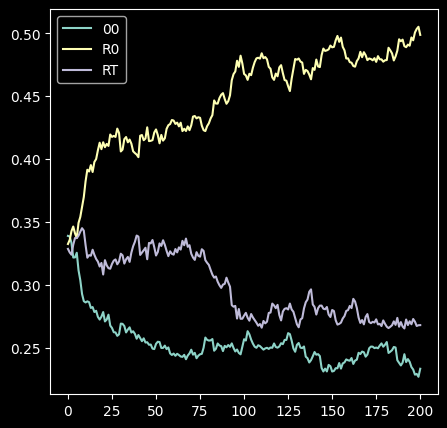

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(ave_str_list, label=["00", "R0", "RT"])
ax.legend()
plt.show()

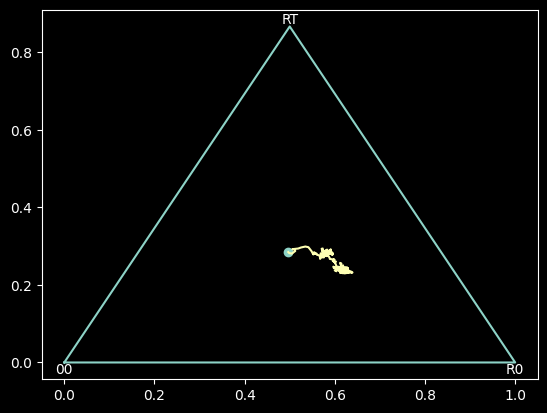

In [16]:
fig, ax = plt.subplots()
plot_triangle(ax)
plot_prob_2D(ave_str_list, ax)
